<center><img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height:150px"></center>

<hr style="border-width:2px;border-color:red">
<center><h1>Test Technique Data Scientist : Mesure de la dérive</h1></center>
<center><h2> Mohamed Aymen BOUYAHIA </h2></center>
<hr style="border-width:2px;border-color:red">

# Contexte

La **dérive** en apprentissage automatique (ou **"drift"** en anglais) fait référence à un **changement dans les données d'entrée ou de sortie d'un modèle** de machine learning **après son entraînement initial**. Cela peut se produire lorsque les données utilisées pour entraîner le modèle ne **reflètent plus la réalité**, ou lorsque **les conditions du problème changent de manière significative**.

La dérive des données peut affecter la précision du modèle de manière significative et peut entraîner des erreurs coûteuses dans les prévisions ou les décisions basées sur le modèle. Par conséquent, **il est important de surveiller régulièrement les performances du modèle** et de le mettre à jour en fonction des nouveaux jeux de données ou des nouvelles conditions du problème.

# Objectif

Dans ce test, vous allez implémenter des métriques permettant de mesurer la dérive d'un modèle dans un usecase de **e-commerce** où nous essayons de prédire le **panier total** (variable **`TotalCart`** : chiffre d'affaire total d'un client sur la période donnée) des clients en fonction des variables suivantes:
* **`Age`** : âge du client en années.
* **`Seniority`** : ancienneté du client en années.
* **`Orders`** : Nombre de commandes effectuées sur la période précédente.
* **`Items`** : Nombre d'items commandés sur la période précédente.
* **`AverageDiscount`** : Réduction moyenne accordée au client sur la période précédente en pourcentage.
* **`TopCategory`** : Catégorie de produits favorite du client.
* **`BrowsingTime`** : Temps total passé sur le site web sur la période précédente en secondes.
* **`EmailsOpened`** : Nombre de mails marketing ouverts par le client sur la période précédente.
* **`SupportInteractions`** : Nombre d'interactions que le client a eu avec le service client sur la période précédente.

Le jeu de données est décomposé en 4 périodes correspondant aux 4 trimestres de l'année 2022. Vous trouverez les données correspondant à chaque période dans les fichiers **`period_0.csv`**, **`period_1.csv`**, ..., **`period_3.csv`**.

Vous allez d'abord **entraîner et évaluer un modèle de machine learning** sur les données de la **période 0**. On supposera que ce modèle sera utilisé pour effectuer les prédictions de panier total sur toute l'année 2022.

Ensuite, vous devrez **implémenter des métriques de dérive** qui vous seront données et **effectuer une analyse** de celle-ci.

# Entraînement du modèle

* **Entraînez et validez** deux ou trois modèles de votre choix sur les données de la période 0.

**Conseils**

* Vous serez évalué sur votre **rigueur** et puis sur les performances du modèle.


* Il n'est pas nécessaire de faire une analyse exploratoire des données.


* Il n'est pas nécessaire de faire de recherche d'hyperparamètres optimaux non plus mais vous pouvez le faire si vous le souhaitez.

#Importation de Bibliothèques

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score,mean_absolute_error


Definition d'une fonction pour évaluer les modèles

In [141]:
def model_performance(model, X_train, X_test, y_train, y_test):
    # Prédictions sur l'ensemble d'entraînement et de test
    y_train_pred = model.predict(X_train)
    y_train_pred = np.maximum(y_train_pred, 0)  #Elimination de valeurs négatives dans la prédiction
    y_test_pred = model.predict(X_test)
    y_test_pred = np.maximum(y_test_pred, 0)    #Elimination de valeurs négatives dans la prédiction


    # Calcul des mesures de performance
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Création du DataFrame
    performance = pd.DataFrame({
        'Score': ['R2', 'RMSE', 'MAE'],
        'Train': [r2_train, rmse_train, mae_train],
        'Test': [r2_test, rmse_test, mae_test]
    })

    return performance

def performance_au_fil_du_temps(model, X1, y1, X2, y2, X3, y3):
  y1_pred = model.predict(X1)
  y1_pred = np.maximum(y1_pred, 0)   #Elimination de valeurs négatives dans la prédiction
  r2_1 = r2_score(y1, y1_pred)
  rmse_1 = np.sqrt(mean_squared_error(y1, y1_pred))
  mae_1 = mean_absolute_error(y1, y1_pred)

  y2_pred = model.predict(X2)
  y2_pred = np.maximum(y2_pred, 0)   #Elimination de valeurs négatives dans la prédiction
  r2_2 = r2_score(y2, y2_pred)
  rmse_2 = np.sqrt(mean_squared_error(y2, y2_pred))
  mae_2 = mean_absolute_error(y2, y2_pred)

  y3_pred = model.predict(X3)
  y3_pred = np.maximum(y3_pred, 0)   #Elimination de valeurs négatives dans la prédiction
  r2_3 = r2_score(y3, y3_pred)
  rmse_3 = np.sqrt(mean_squared_error(y3, y3_pred))
  mae_3 = mean_absolute_error(y3, y3_pred)


  performance = pd.DataFrame({
    'Score': ['Periode_1', 'Periode_2', 'Periode_3'],
    'R2': [r2_1, r2_2, r2_3],
    'RMSE': [rmse_1, rmse_2, rmse_3],
    'MAE': [mae_1, mae_2, mae_3],
  })

  return performance

#Analyse des données

In [142]:
"""Certains modèles qui seront utilisés dans ce NoteBook peuvent traiter des données
catégorielles sans utiliser d'encodage auparavant. Cependant, les encodages
intégrés à ces modèles sont bien différents d'où pour garantir une certaine "fairness",
l'encodage a été fait lors du pre-processing."""

data = pd.read_csv('period_0.csv', sep=",", decimal=".")
#data_encoded = pd.get_dummies(data, columns=["TopCategory"])
label_encoder = LabelEncoder()
data['TopCategory_encoded'] = label_encoder.fit_transform(data['TopCategory'])
data = data.drop(columns=['TopCategory'])

data.head()

,Age,Seniority,Orders,Items,AverageDiscount,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart,TopCategory_encoded
0,21,2,4,7,0.14,68.473629,3,2,34.00,1
1,22,0,4,5,0.50,29.258063,1,0,28.28,8
2,22,1,2,6,0.37,11.515517,0,0,19.33,3
3,19,0,2,8,0.60,74.495861,1,0,26.83,8
4,25,1,1,5,0.58,1.682705,2,1,17.67,8


In [143]:
data.info()
#(data['TotalCart'] < 0).sum()
#data.isnull().sum()
#data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   int64  
 1   Seniority            1000 non-null   int64  
 2   Orders               1000 non-null   int64  
 3   Items                1000 non-null   int64  
 4   AverageDiscount      1000 non-null   float64
 5   BrowsingTime         1000 non-null   float64
 6   EmailsOpened         1000 non-null   int64  
 7   SupportInteractions  1000 non-null   int64  
 8   TotalCart            1000 non-null   float64
 9   TopCategory_encoded  1000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


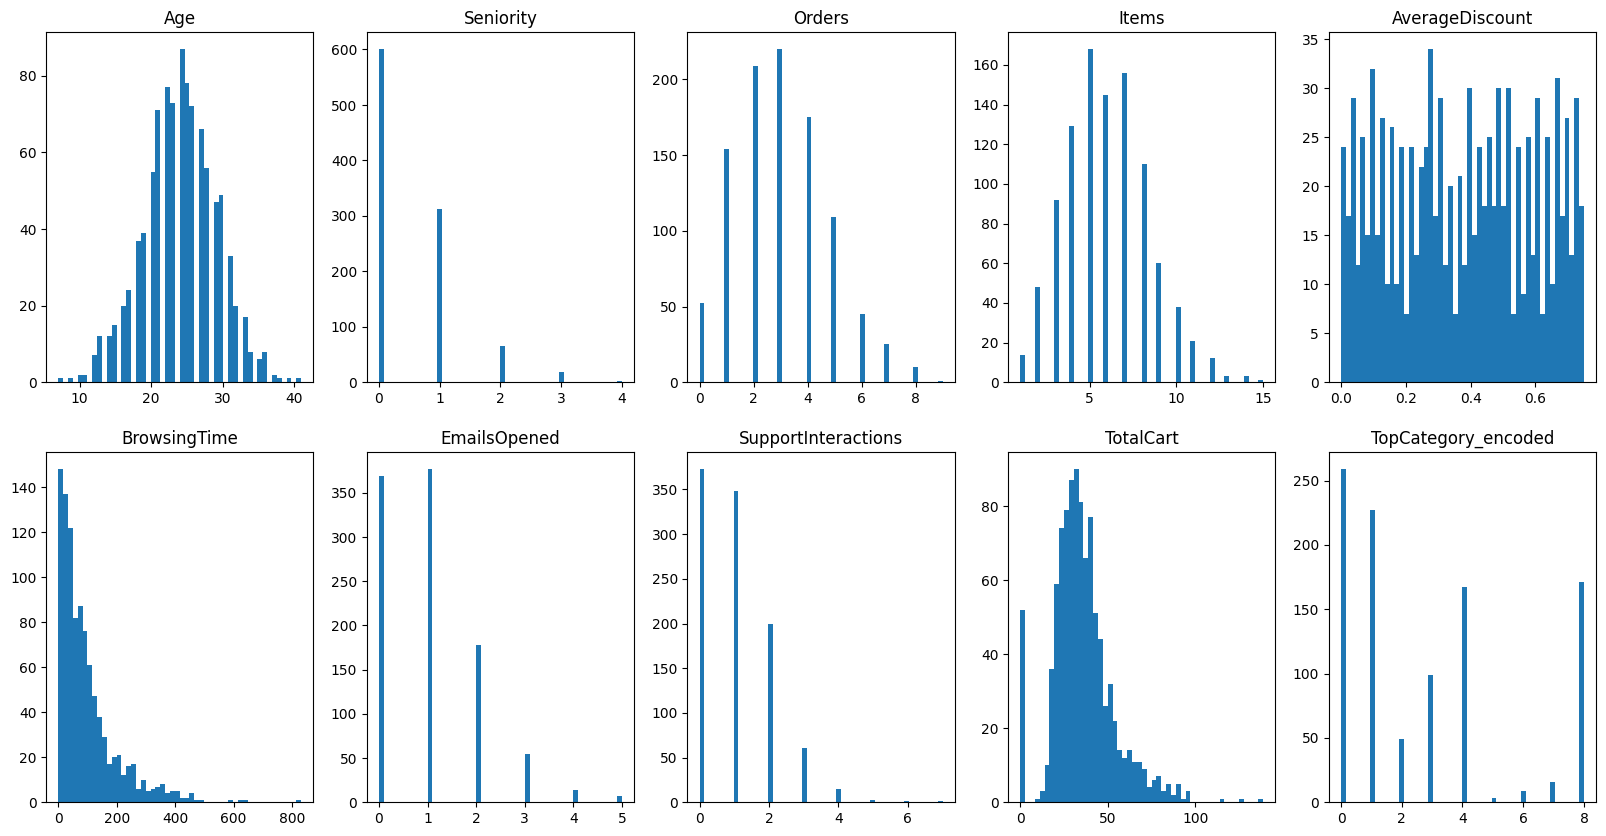

'X = data.drop("TotalCart", axis = 1)\n\nfor col in X.columns:\n  sns.scatterplot(x=X[col], y = data["TotalCart"])\n  plt.show()'

In [144]:
#Visualisation de la distribution des données

fig, axs = plt.subplots(2,5,figsize=(20,10))
axs = axs.ravel()

for i, column in enumerate(data.columns):
  axs[i].hist(data[column], bins=50)
  axs[i].set_title(column)
plt.show()


#Création de boxplots pour la visualisation des données
"""for column in data.columns:
  fig, ax = plt.subplots(figsize = (8,3))
  sns.boxplot(x=data[column], ax=ax)
  plt.title(column)
  plt.show()"""


#Création d'un nuage de points pour la visualisation des données
"""X = data.drop("TotalCart", axis = 1)

for col in X.columns:
  sns.scatterplot(x=X[col], y = data["TotalCart"])
  plt.show()"""

<Axes: >

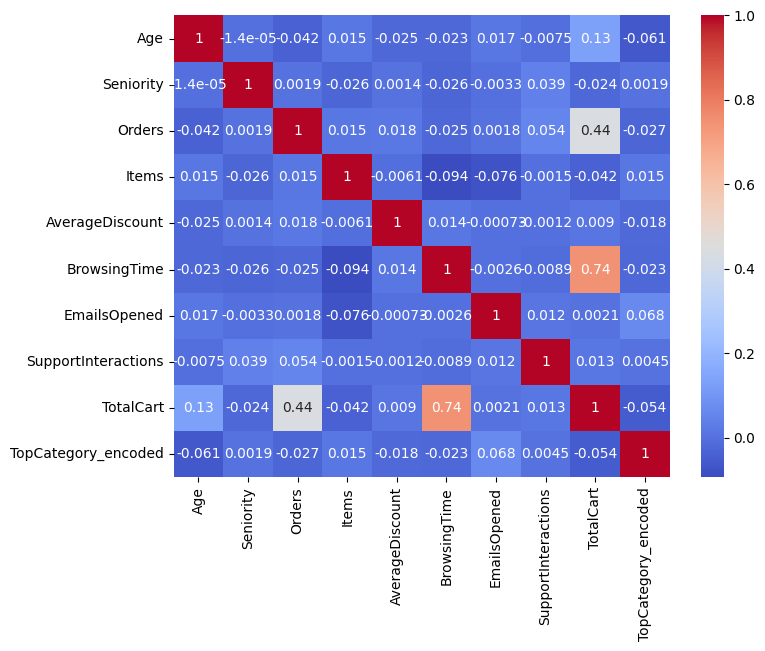

In [145]:
#Visualisation des corrélations entre les features pour la période 0

corr_matrix = data.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm")

In [146]:
#Définir les données du train et la target
X0 = data.drop("TotalCart", axis=1)
y0 = data["TotalCart"]

#Diviser les données en train et test

train, test = train_test_split(data, test_size=0.2, random_state=42)

X_train = train.drop("TotalCart", axis=1)
y_train = train["TotalCart"]
X_test = test.drop("TotalCart", axis=1)
y_test = test["TotalCart"]

#Entrainement de modèles de Machine Learning

* **Entrainez votre modèle sur toute la période 0** puis **testez votre modèle** sur les données des **périodes 1, 2 et 3**. Comment évolue la performance du modèle?

In [147]:
# Créer un modèle de Régression Linéaire
model = LinearRegression()

#Evaluation du modèle
model.fit(X_train, y_train)
performance = model_performance(model, X_train, X_test, y_train, y_test)
print(performance)

#Entrainer le modèle sur toute la période 0
lr_model = LinearRegression()
lr_model.fit(X0, y0)

  Score     Train      Test
0    R2  0.767550  0.922903
1  RMSE  8.717915  4.321334
2   MAE  4.884372  3.432052


LinearRegression()

In [148]:
# Créer un modèle de Decision Tree
model = DecisionTreeRegressor(random_state=42)

# Définir les hyperparamètres à rechercher
param_grid = {'max_depth': [4, 6, 8], 'min_samples_leaf': [5, 10, 15]}

#Trouver les meilleurs paramètres
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_


performance = model_performance(model, X_train, X_test, y_train, y_test)
print(performance)

#Entrainer le modèle sur toute la période 0
dt_model = DecisionTreeRegressor(random_state=42, **grid_search.best_params_)
dt_model.fit(X0, y0)

  Score     Train      Test
0    R2  0.977615  0.948318
1  RMSE  2.705380  3.538096
2   MAE  1.874472  2.647537


DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, random_state=42)

In [149]:
# Créer un modèle de Random Forest
rf = RandomForestRegressor(random_state=42)

# Définir les hyperparamètres à rechercher
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8]
}

#Trouver les meilleurs paramètres
grid_search = GridSearchCV(rf, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_


performance = model_performance(model, X_train, X_test, y_train, y_test)
print(performance)


#Entrainer le modèle sur toute la période 0
rf_model = RandomForestRegressor(random_state=42, **grid_search.best_params_)
rf_model.fit(X0, y0)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
  Score     Train      Test
0    R2  0.993291  0.976438
1  RMSE  1.481091  2.388928
2   MAE  1.075806  1.779131


RandomForestRegressor(max_depth=8, n_estimators=300, random_state=42)

In [150]:
#!pip install catboost
from catboost import CatBoostRegressor

#Une manière pour traiter les données catégoriques avec CatBoost
#categorical_features = ["TotalCart"]
#model = CatBoostClassifier(cat_features=categorical_features)

catboost = CatBoostRegressor(random_state=42)
parameters = {
    'depth': [4,6,8],
    'iterations': [100,200,300],
    'learning_rate': [0.01, 0.1, 1],
    'l2_leaf_reg' : [1,2,3],
}

grid_search = GridSearchCV(catboost, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

model = grid_search.best_estimator_
performance = model_performance(model, X_train, X_test, y_train, y_test)

ctb_model = CatBoostRegressor(random_state=42, **grid_search.best_params_)
ctb_model.fit(X0, y0)
print(performance)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
0:	learn: 16.6972388	total: 5.84ms	remaining: 1.75s
1:	learn: 15.6450065	total: 7.61ms	remaining: 1.13s
2:	learn: 14.4776795	total: 9.88ms	remaining: 978ms
3:	learn: 13.5685000	total: 11.5ms	remaining: 848ms
4:	learn: 12.6465045	total: 13ms	remaining: 769ms
5:	learn: 11.9004773	total: 14.9ms	remaining: 732ms
6:	learn: 11.1347314	total: 16.4ms	remaining: 688ms
7:	learn: 10.3596279	total: 17.6ms	remaining: 644ms
8:	learn: 9.6785553	total: 19.3ms	remaining: 625ms
9:	learn: 9.1253361	total: 21.1ms	remaining: 612ms
10:	learn: 8.6027832	total: 22.8ms	remaining: 600ms
11:	learn: 8.1244094	total: 24.7ms	remaining: 592ms
12:	learn: 7.7049739	total: 26.3ms	remaining: 581ms
13:	learn: 7.2703129	total: 28ms	remaining: 573ms
14:	learn: 6.8591820	total: 29.7ms	remaining: 564ms
15:	learn: 6.5634045	total: 31.2ms	remaining: 555ms
16:	learn: 6.3038592	total: 33.3ms	remaining: 554ms
17:	learn: 5.9653559	total: 35.3ms	remaining: 553ms
18:	lear

In [151]:
#Pre-processing des données des périodes 1, 2 et 3

data1 = pd.read_csv('period_1.csv', sep=",", decimal=".")
#data_encoded = pd.get_dummies(data, columns=["TopCategory"])
label_encoder = LabelEncoder()
data1['TopCategory_encoded'] = label_encoder.fit_transform(data1['TopCategory'])
data1 = data1.drop(columns=['TopCategory'])
X1 = data1.drop("TotalCart", axis=1)
y1 = data1["TotalCart"]


data2 = pd.read_csv('period_2.csv', sep=",", decimal=".")
#data_encoded = pd.get_dummies(data, columns=["TopCategory"])
label_encoder = LabelEncoder()
data2['TopCategory_encoded'] = label_encoder.fit_transform(data2['TopCategory'])
data2 = data2.drop(columns=['TopCategory'])
X2 = data2.drop("TotalCart", axis=1)
y2 = data2["TotalCart"]



data3 = pd.read_csv('period_3.csv', sep=",", decimal=".")
#data_encoded = pd.get_dummies(data, columns=["TopCategory"])
label_encoder = LabelEncoder()
data3['TopCategory_encoded'] = label_encoder.fit_transform(data3['TopCategory'])
data3 = data3.drop(columns=['TopCategory'])
X3 = data3.drop("TotalCart", axis=1)
y3 = data3["TotalCart"]




<Axes: >

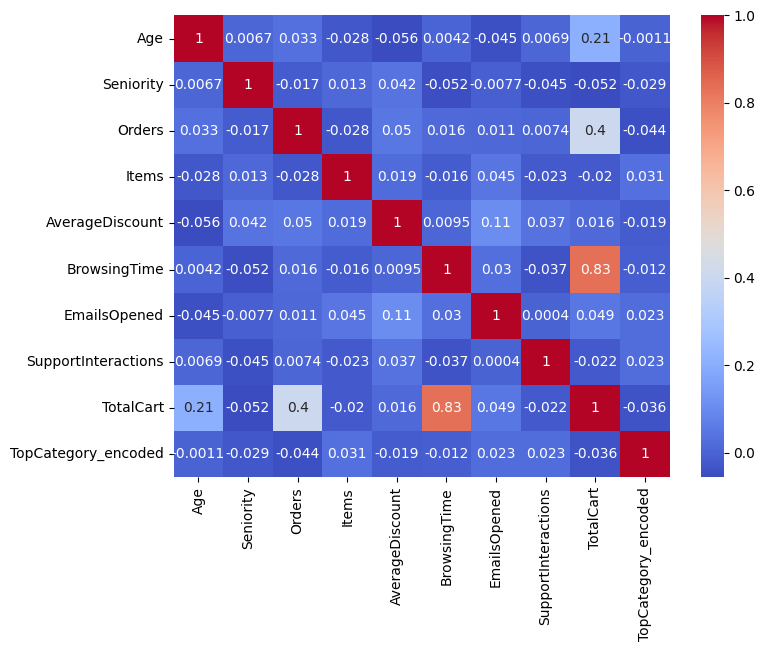

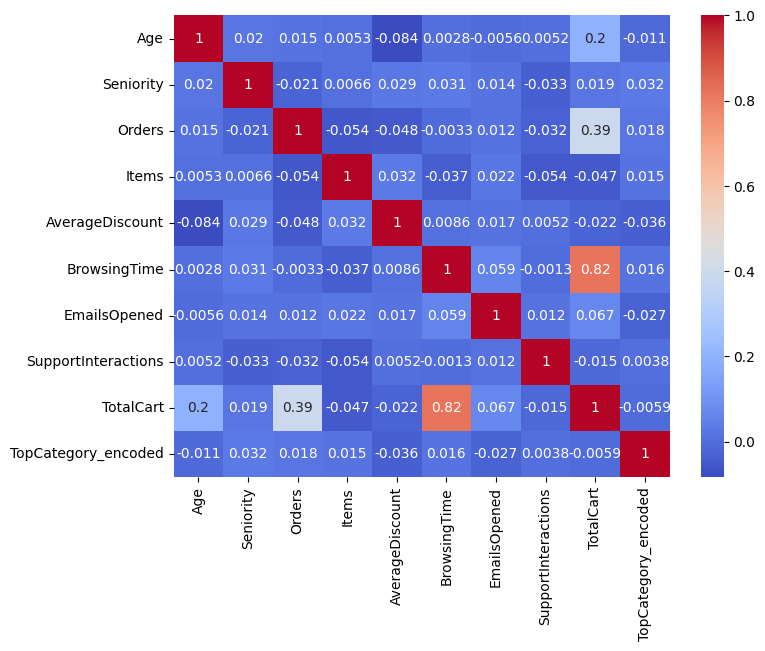

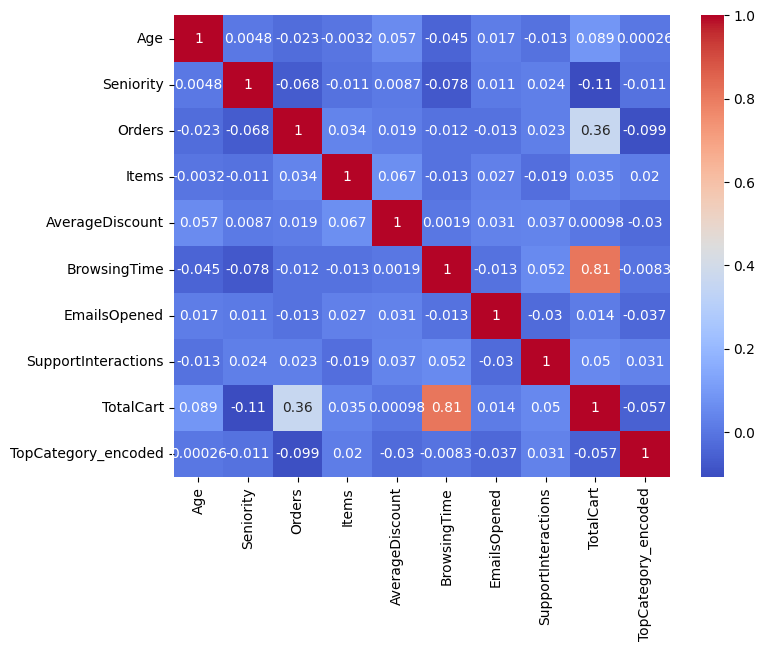

In [152]:
#Visualisation des corrélations entre les features pour les périodes 1, 2 et 3


corr_matrix = data1.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm")

corr_matrix = data2.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm")

corr_matrix = data3.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm")

#Evaluation des modèles

In [153]:
print("Performance de Linear Regression")
print(performance_au_fil_du_temps(lr_model,X1,y1,X2,y2,X3,y3))
print("Performance de Decision Tree")
print(performance_au_fil_du_temps(dt_model,X1,y1,X2,y2,X3,y3))
print("Performance de RandomForest")
print(performance_au_fil_du_temps(rf_model,X1,y1,X2,y2,X3,y3))
print("Performance de CatBoost")
print(performance_au_fil_du_temps(ctb_model,X1,y1,X2,y2,X3,y3))

Performance de Linear Regression
       Score        R2       RMSE        MAE
0  Periode_1  0.746722   9.457857   6.976257
1  Periode_2  0.713476  10.472695   7.648229
2  Periode_3  0.568598  15.359782  11.499681
Performance de Decision Tree
       Score        R2       RMSE        MAE
0  Periode_1  0.781735   8.779833   7.900701
1  Periode_2  0.763440   9.515859   8.532715
2  Periode_3  0.665362  13.527935  11.518320
Performance de RandomForest
       Score        R2       RMSE        MAE
0  Periode_1  0.814291   8.098603   7.566684
1  Periode_2  0.791712   8.929134   8.304885
2  Periode_3  0.697269  12.866864  11.349954
Performance de CatBoost
       Score        R2       RMSE        MAE
0  Periode_1  0.813020   8.126282   7.683686
1  Periode_2  0.796721   8.821116   8.390870
2  Periode_3  0.677162  13.287283  11.368372


# Mesure de la dérive de variables catégorielles.

Pour deux distributions de probabilités discrètes $P$ et $Q$, la **divergence de Kullback–Leibler** de $P$ par rapport à $Q$ est définie par:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$


On définit la **divergence de Jensen-Shannon** comme une version lisse et symétrique de la divergence de Kullback-Leiber donnée par la formule suivante:

$${\rm JSD}(P \parallel Q)= \frac{1}{2}D(P \parallel M)+\frac{1}{2}D(Q \parallel M)$$

où $M=\frac{1}{2}(P+Q)$

### Exemple de calcul de $D_\text{KL}(P \parallel Q)$ :

Soient $P$ =`[0.2, 0.3, 0.5]` et $Q$ =`[0.2, 0.4, 0.4]` deux vecteurs définissant une loi de probabilité discrete. Alors :

$$
\begin{equation}
\begin{split}
D_\text{KL}(P \parallel Q) & = P(0) \log\left(\frac{P(0)}{Q(0)}\right)
                             + P(1) \log\left(\frac{P(1)}{Q(1)}\right)
                             + P(2) \log\left(\frac{P(2)}{Q(2)}\right)\\ \\
                           & = 0.2 \log\left(\frac{0.2}{0.2}\right)
                             + 0.3 \log\left(\frac{0.3}{0.4}\right)
                             + 0.5 \log\left(\frac{0.5}{0.4}\right) \\ \\
                           & = 0.02526...
\end{split}
\end{equation}
$$

### Exercice

* Implémenter des fonctions nommées **`KLDivergence(P, Q)`** et **`JSDivergence(P, Q)`** permettant de calculer les métriques définies ci-dessus.

**Conseils**:
* Utiliser la librairie Numpy permettant de facilement effectuer des calculs d'algèbre linéaire.

In [154]:
import numpy as np

P = [0.2, 0.3, 0.5]
Q = [0.2, 0.4, 0.4]

def KLDivergence(P, Q):
  if len(P) != len(Q):
    raise ValueError("Les vecteurs P et Q doivent avoir la même longueur.")

  if not all(0 <= p <= 1 for p in P) or not all(0 <= q <= 1 for q in Q):
    raise ValueError("Les vecteurs P et Q doivent contenir des probabilités valides.")

  kl_divergence = 0
  for p, q in zip(P, Q):
    if p != 0 and q != 0:
        kl_divergence += p * np.log(p / q)

  return kl_divergence

def JSDivergence(P, Q):

  M = 0.5 * (np.array(P) + np.array(Q))

  kl_divergence_PM = KLDivergence(P, M)

  kl_divergence_QM = KLDivergence(Q, M)

  js_divergence = 0.5 * (kl_divergence_PM + kl_divergence_QM)

  return js_divergence


* Lancer la cellule suivante pour tester votre fonction.

In [155]:
import numpy as np

P = [0.2, 0.3, 0.5]
Q = [0.2, 0.4, 0.4]

print("K-L Divergence:", KLDivergence(P, Q))
print("J-S Divergence:", JSDivergence(P, Q))

K-L Divergence: 0.02526715392157057
J-S Divergence: 0.006367198333995731


# Mesure de la dérive de variables quantitatives.

Soit $P$ une mesure empirique d'échantillons $X_1, \ldots, X_n
$ et $Q$ une mesure empirique d'échantillons $Y_1, \ldots, Y_n$, on définit la **Distance de Wasserstein** d'ordre $p$ par la fonction suivante :

$$W_p(P, Q) = \left( \frac{1}{n}\sum_{i=1}^n \|X_{(i)} - Y_{(i)}\|^p \right)^{1/p}$$

où $X_{(1)}, \ldots, X_{(n)}$ et $Y_{(1)}, \ldots, Y_{(n)}$ sont les [**statistiques d'ordre**](https://en.wikipedia.org/wiki/Order_statistic#Notation_and_examples) des échantillons $X$ et $Y$ et $p$ un nombre entier positif.

### Exercice

* Implémenter une fonction nommée **`WassersteinDistance(X, Y, p)`** permettant de calculer cette métrique à l'ordre **`p`** à partir de **deux échantillons** **`X`** et **`Y`** que l'on supposera de même longueur.

**Conseils**:
* Vous pouvez trier les échantillons pour obtenir les statistiques d'ordre.

In [156]:
def WassersteinDistance(X, Y, p):
  if len(X) != len(Y):
    raise ValueError("Les échantillons doivent avoir la même longueur.")


  X_sorted = np.sort(X)
  Y_sorted = np.sort(Y)

  distance = np.sum(np.abs(X_sorted - Y_sorted) ** p) / len(X)

  wasserstein = distance ** (1/p)
  return wasserstein

* Lancer la cellule suivante pour tester votre fonction.

In [157]:
X = np.random.beta(2, 6, 100)

Y = np.random.beta(3, 6, 100)

WassersteinDistance(X, Y, 2)

0.06862152767662193

mean = data["TotalCart"].mean()
std = data["TotalCart"].std()# Étude de la dérive du modèle.

* En vous appuyant sur les métriques définies précédemment, illustrez et analysez visuellement la **dérive des données** ainsi que **la dérive du modèle** sur les périodes **1 à 3**.


* Commenter les visualisations et déterminer si le modèle doit être mis à jour ou si sa performance est toujours acceptable.

**Conseils**:
* Vous serez évalué sur **la rigueur et le soin** que vous donnerez à votre analyse, et sur **vos capacités à synthéthiser votre étude**. Vous ne serez pas évalué sur vos conclusions.


* Vous pouvez normaliser les données par rapport aux moyennes et variances que vous calculerez sur la période 0 pour que les distances de Wasserstein pour différentes variables soient facilement comparables.


KLdivergence et JSDivergence des données

#Dérive des données

In [158]:
#Préparation des données pour la KLdivergence et la JSDivergence


value0 = y0.values / np.sum(y0.values)
value1 = y1.values / np.sum(y1.values)
value2 = y2.values / np.sum(y2.values)
value3 = y3.values / np.sum(y3.values)


#Préparation des données pour la Wasserstein Distance

mean = y0.mean()
std = y0.std()
value_0 = (y0 - mean) / std

mean = y1.mean()
std = y1.std()
value_1 = (y1 - mean) / std

mean = y2.mean()
std = y2.std()
value_2 = (y2 - mean) / std

mean = y3.mean()
std = y3.std()
value_3 = (y3 - mean) / std


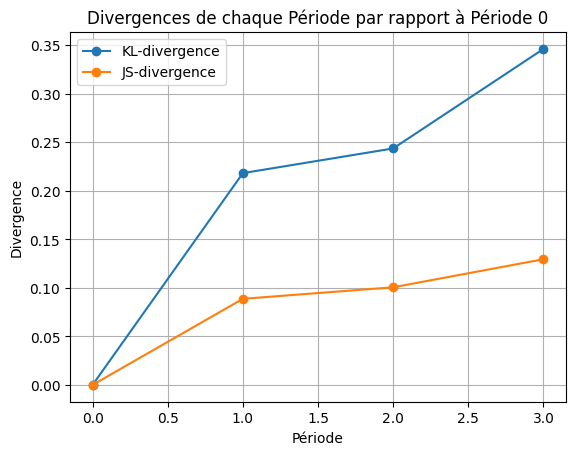

In [159]:
# Calcul de la divergence de chaque période par rapport à la Période 0

KLdivergences = []
JSDivergences = []

divergence_0_0 = KLDivergence(value0, value0)
KLdivergences.append(divergence_0_0)
divergence_0_0 = JSDivergence(value0, value0)
JSDivergences.append(divergence_0_0)

divergence = KLDivergence(value1, value0)
KLdivergences.append(divergence)
divergence = JSDivergence(value1, value0)
JSDivergences.append(divergence)

divergence = KLDivergence(value2, value0)
KLdivergences.append(divergence)
divergence = JSDivergence(value2, value0)
JSDivergences.append(divergence)


divergence = KLDivergence(value3, value0)
KLdivergences.append(divergence)
divergence = JSDivergence(value3, value0)
JSDivergences.append(divergence)


# Visualisation des divergences
plt.plot(range(4), KLdivergences, marker='o', label='KL-divergence')
plt.plot(range(4), JSDivergences, marker='o', label='JS-divergence')

plt.xlabel("Période")
plt.ylabel("Divergence")
plt.title("Divergences de chaque Période par rapport à Période 0")
plt.legend()
plt.grid(True)
plt.show()

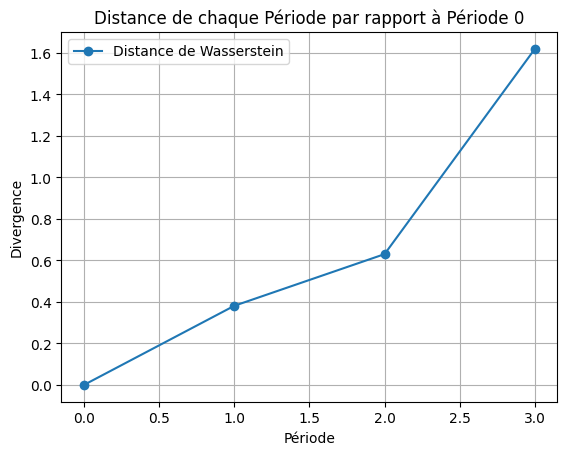

In [160]:
# Calcul de la divergence de chaque période par rapport à la Période 0

Wasserstein = []

divergence_0_0 = WassersteinDistance(value_0, value_0, 10)
Wasserstein.append(divergence_0_0)

divergence = WassersteinDistance( value_1, value_0, 10)
Wasserstein.append(divergence)

divergence = WassersteinDistance(value_2, value_0, 10)
Wasserstein.append(divergence)

divergence = WassersteinDistance(value_3, value_0, 10)
Wasserstein.append(divergence)



# Visualisation des divergences
plt.plot(range(4), Wasserstein, marker='o', label='Distance de Wasserstein')


plt.xlabel("Période")
plt.ylabel("Divergence")
plt.title("Distance de chaque Période par rapport à Période 0")
plt.legend()  # Ajoutez une légende pour indiquer les types de divergence
plt.grid(True)
plt.show()

On remarque qu'il y a une dérive dans la dataset mais heureusement cette dérive n'a pas créé de de nouvelles corrélations entre les features (On remarque ça grace à la matrice de corrélation)

#Dérive des modèles

In [161]:
#Préparation des données pour la KLdivergence et la JSDivergence

value0_pred = ctb_model.predict(X0)
value0_pred = np.maximum(value0_pred, 0)
value0_pred = value0_pred / np.sum(value0_pred)

value1_pred = ctb_model.predict(X1)
value1_pred = np.maximum(value1_pred, 0)
value1_pred = value1_pred/ np.sum(value1_pred)

value2_pred = ctb_model.predict(X2)
value2_pred = np.maximum(value2_pred, 0)
value2_pred = value2_pred / np.sum(value2_pred)

value3_pred = ctb_model.predict(X3)
value3_pred = np.maximum(value3_pred, 0)
value3_pred = value3_pred / np.sum(value3_pred)



#Préparation des données pour la Wasserstein Distance

value_0_pred = ctb_model.predict(X0)
value_0_pred = np.maximum(value_0_pred, 0)
mean = value_0_pred.mean()
std = value_0_pred.std()
value_0_pred = (value_0_pred - mean) / std

value_1_pred = ctb_model.predict(X1)
value_1_pred = np.maximum(value_1_pred, 0)
mean = value_1_pred.mean()
std = value_1_pred.std()
value_1_pred = (value_1_pred - mean) / std

value_2_pred = ctb_model.predict(X2)
value_2_pred = np.maximum(value_2_pred, 0)
mean = value_2_pred.mean()
std = value_2_pred.std()
value_2_pred = (value_2_pred - mean) / std

value_3_pred = ctb_model.predict(X3)
value_3_pred = np.maximum(value_3_pred, 0)
mean = value_3_pred.mean()
std = value_3_pred.std()
value_3_pred = (value_3_pred - mean) / std

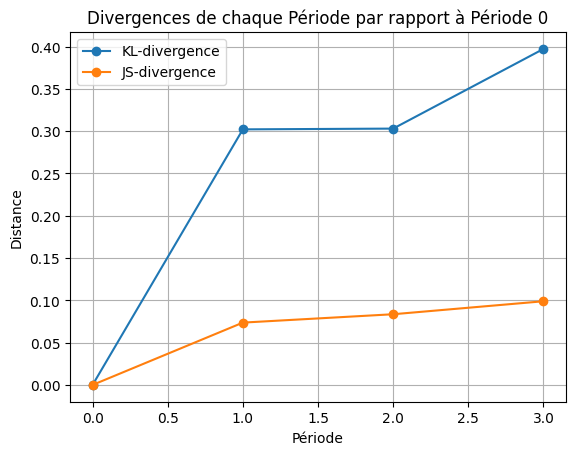

In [162]:
# Calcul de la divergence de chaque période par rapport à la Période 0

KLdivergences = []
JSDivergences = []

divergence_0_0 = KLDivergence(value0_pred, value0_pred)
KLdivergences.append(divergence_0_0)
divergence_0_0 = JSDivergence(value0_pred, value0_pred)
JSDivergences.append(divergence_0_0)

divergence = KLDivergence(value1_pred, value0_pred)
KLdivergences.append(divergence)
divergence = JSDivergence(value1_pred, value0_pred)
JSDivergences.append(divergence)

divergence = KLDivergence(value2_pred, value0_pred)
KLdivergences.append(divergence)
divergence = JSDivergence(value2_pred, value0_pred)
JSDivergences.append(divergence)


divergence = KLDivergence(value3_pred, value0_pred)
KLdivergences.append(divergence)
divergence = JSDivergence(value3_pred, value0_pred)
JSDivergences.append(divergence)


# Visualisation des divergences
plt.plot(range(4), KLdivergences, marker='o', label='KL-divergence')
plt.plot(range(4), JSDivergences, marker='o', label='JS-divergence')

plt.xlabel("Période")
plt.ylabel("Distance")
plt.title("Divergences de chaque Période par rapport à Période 0")
plt.legend()  # Ajoutez une légende pour indiquer les types de divergence
plt.grid(True)
plt.show()

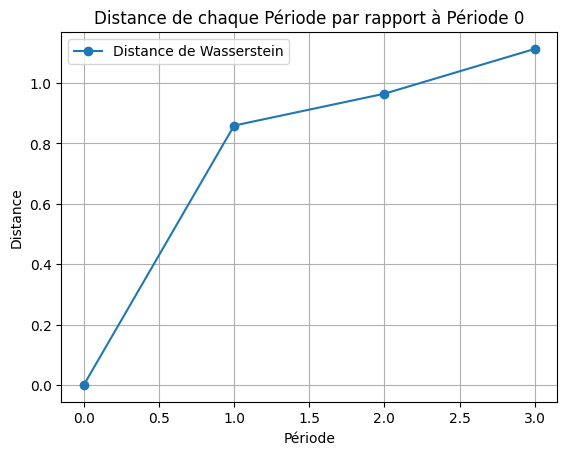

In [163]:
# Calcul de la Wasserstein Distance de chaque période par rapport à la Période 0

Wasserstein = []

divergence_0_0 = WassersteinDistance(value_0_pred, value_0_pred, 10)
Wasserstein.append(divergence_0_0)

divergence = WassersteinDistance( value_1_pred, value_0_pred, 10)
Wasserstein.append(divergence)

divergence = WassersteinDistance(value_2_pred, value_0_pred, 10)
Wasserstein.append(divergence)

divergence = WassersteinDistance(value_3_pred, value_0_pred, 10)
Wasserstein.append(divergence)



# Visualisation des divergences
plt.plot(range(4), Wasserstein, marker='o', label='Distance de Wasserstein')
plt.xlabel("Période")
plt.ylabel("Distance")
plt.title("Distance de chaque Période par rapport à Période 0")
plt.legend()
plt.grid(True)
plt.show()

La dérivation des prédictions du modèle par rapport à sa première prédiction diffère légérement de la dérivation des données de période par rapport à la première période.

Ceci suggère qu'il y a une certaine dérivation dans le modèle qu'il faudrait corriger en ré-entrainant le modèle à une certaine période. Pour déterminer la période, une idée pourrait etre de visualiserla dérivation en fonction des périodes. La section d'après est dédiée pour ça.


#Evolution de la dérive du modèle par rapport aux données

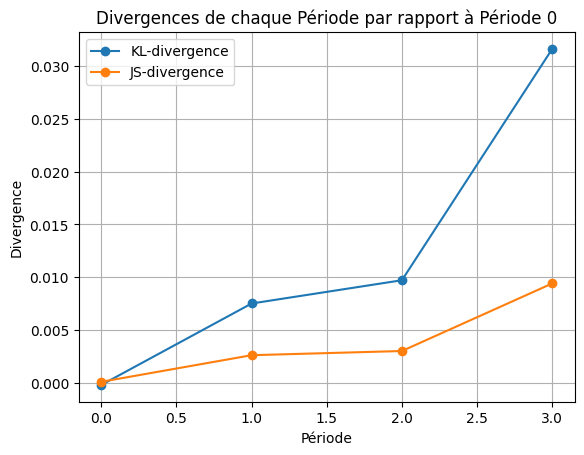

In [164]:
# Calcul de la divergence de chaque période par rapport à la Période 0
KLdivergences = []
JSDivergences = []

divergence_0_0 = KLDivergence(value0_pred, value0)
KLdivergences.append(divergence_0_0)
divergence_0_0 = JSDivergence(value0_pred, value0)
JSDivergences.append(divergence_0_0)

divergence = KLDivergence(value1_pred, value1)
KLdivergences.append(divergence)
divergence = JSDivergence(value1_pred, value1)
JSDivergences.append(divergence)

divergence = KLDivergence(value2_pred, value2)
KLdivergences.append(divergence)
divergence = JSDivergence(value2_pred, value2)
JSDivergences.append(divergence)


divergence = KLDivergence(value3_pred, value3)
KLdivergences.append(divergence)
divergence = JSDivergence(value3_pred, value3)
JSDivergences.append(divergence)


# Visualisation des divergences
plt.plot(range(4), KLdivergences, marker='o', label='KL-divergence')
plt.plot(range(4), JSDivergences, marker='o', label='JS-divergence')
plt.xlabel("Période")
plt.ylabel("Divergence")
plt.title("Divergences de chaque Période par rapport à Période 0")
plt.legend()
plt.grid(True)
plt.show()

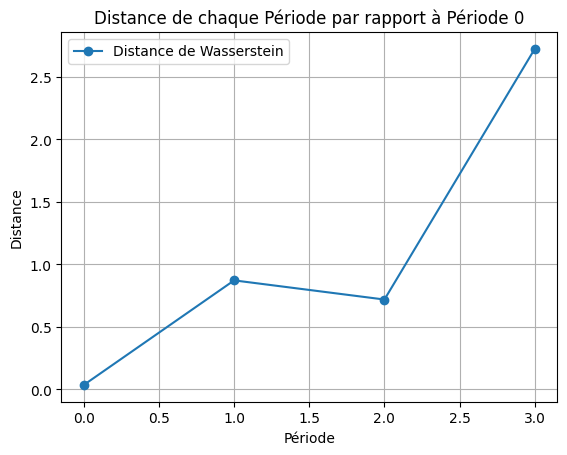

In [165]:
# Calcul de la Wasserstein Distance de chaque période par rapport à la Période 0

Wasserstein = []

divergence_0_0 = WassersteinDistance(value_0_pred, value_0, 10)
Wasserstein.append(divergence_0_0)

divergence = WassersteinDistance( value_1_pred, value_1, 10)
Wasserstein.append(divergence)

divergence = WassersteinDistance(value_2_pred, value_2, 10)
Wasserstein.append(divergence)

divergence = WassersteinDistance(value_3_pred, value_3, 10)
Wasserstein.append(divergence)



# Visualisation des divergences
plt.plot(range(4), Wasserstein, marker='o', label='Distance de Wasserstein')
plt.xlabel("Période")
plt.ylabel("Distance")
plt.title("Distance de chaque Période par rapport à Période 0")
plt.legend()
plt.grid(True)
plt.show()

On remarque une montée relativement remarquable dans la Distance de Wasserstein à partir de la deuxième période. Ceci peut représenter un risque pour le modèle vis à vis sa performance. Pour y remédier, il faudrait ré-entrainer le modèle à cette période la.

#Conclusion

Selon la Distance de Wasserstein ainsi que la Divergence de Kullback–Leibler et de Jensen-Shannon, on peut remarquer qu'il y a une certaine dérive dans la prédiction du modèle tout au long des périodes par rapport à la première période. Pour pouvoir déterminer à partir de quelle période il faudrait ré-entrainer le modèle, une mesure de la dérivation en fonction des périodes peut etre intéressante.

Cette mesure nous montre qu'il est préférable de ré-entrainer le modèle à partir de la deuxième période.